# **Importing the  library**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

# **Data Collection and Processing**

In [74]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv(r'/content/sample_data/gld_price_data.csv')

In [75]:
# print first 5 rows in the dataframe
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [76]:
# print last 5 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [77]:
# number of rows and columns
df.shape

(2290, 6)

In [78]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [79]:
# checking the number of missing values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [80]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [81]:
# remove unnecessry columns
df_new = df.drop(columns=['Date'],inplace=True)
df.head(3)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492


# **Correlation:**

<Axes: >

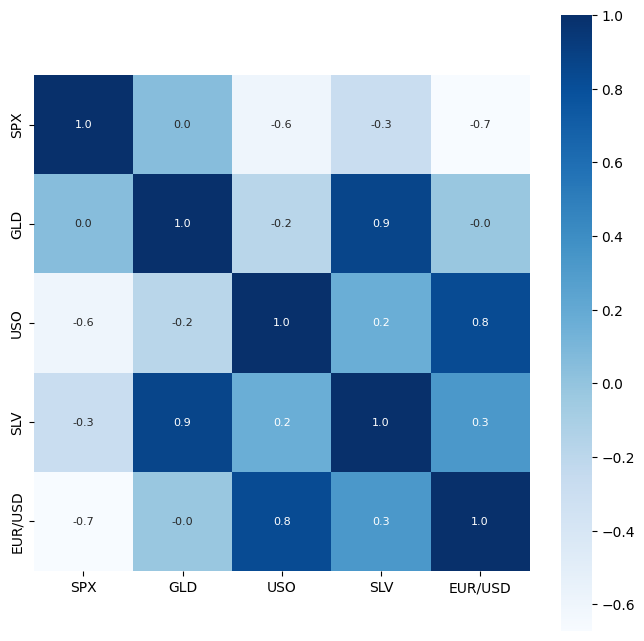

In [82]:
correlation =df.corr()
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [83]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


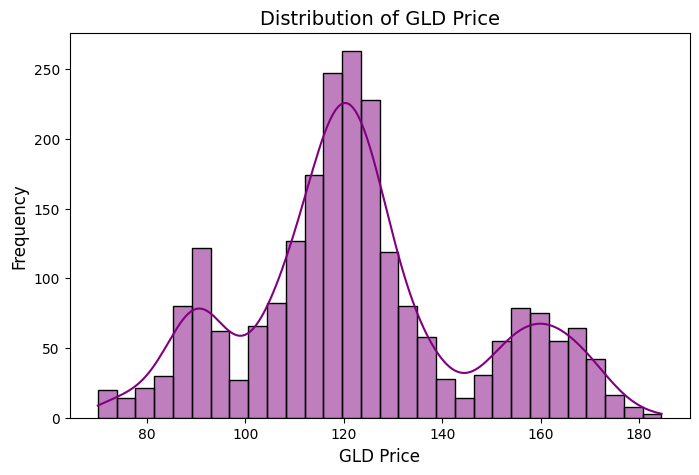

In [84]:
# checking the distribution of the GLD Price
plt.figure(figsize=(8, 5))
sns.histplot(df['GLD'], bins=30, kde=True, color='purple')

plt.title("Distribution of GLD Price", fontsize=14)
plt.xlabel("GLD Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

# **Splitting the Features and Target**

In [85]:
X = df.drop(['GLD'],axis=1)
Y = df['GLD']

In [86]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [87]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


# **Splitting into Training data and Test Data**

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# **Model Training:** **Random Forest Regressor**

In [89]:
regressor = RandomForestRegressor()

In [90]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# **Model Evaluation**

In [91]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [92]:
print(test_data_prediction)

[168.69799959  82.05379982 115.84609992 127.63900075 120.75880155
 154.54679723 150.34589867 126.15890022 117.49829881 125.82620126
 116.80200095 171.81910142 141.33379831 167.6974983  115.2120003
 117.33260046 140.72180269 169.96360129 159.85690344 158.8101995
 155.09140035 124.95349977 175.78229944 157.15100344 125.13660016
  93.77589975  76.61840058 120.48750006 119.05739906 167.59009961
  87.93650058 125.21510013  91.28200089 117.48240065 121.11729912
 135.98850104 115.55260077 115.33670072 148.91340012 107.25240067
 104.36450242  87.22989816 126.63270037 118.08129942 153.94449873
 119.66319991 108.31170018 108.00779836  93.1501005  127.2669972
  74.8952003  113.86029952 121.28410017 111.37709909 118.76309901
 120.25669947 158.67049981 168.21810119 146.93399654  85.99309875
  94.34720035  86.82389854  90.52799994 118.86060087 126.41880028
 127.45239978 169.54359941 122.27119922 117.26129918  98.20450052
 168.57210175 143.20459785 132.40380331 121.2453022  121.60659958
 119.66220081

In [93]:
# R squared error
error_score =r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9886807376828953


# **Compare the Actual Values and Predicted Values in a Plot**

In [94]:
Y_test = list(Y_test)

<ipython-input-95-171a7644162a>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


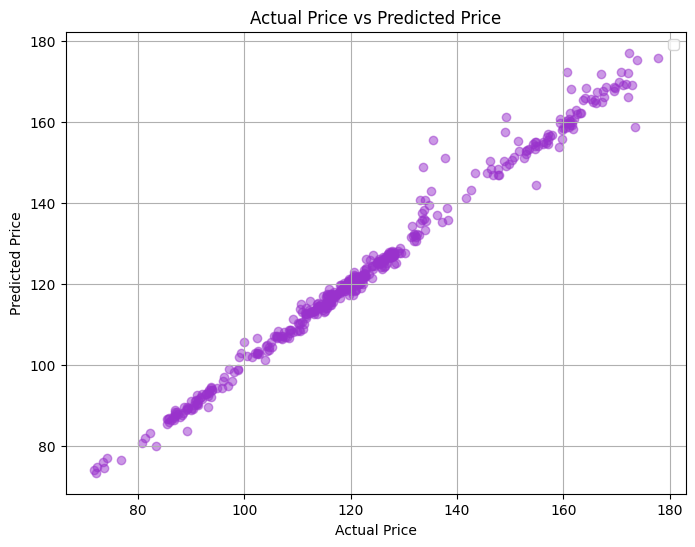

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y_test, test_data_prediction, color='DarkOrchid', alpha=0.5)  # تغيير اللون إلى بنفسجي
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.legend()
plt.show()

In [96]:
df=joblib.dump(regressor,'gold_price_model.pkl')

In [97]:
pip install gradio

In [104]:
import pandas as pd
import gradio as gr
import joblib

# تحميل الموديل المدرب
rf = joblib.load("/content/gold_price_model.pkl")  # تأكد أن لديك ملف الموديل

def predict_gold_price(spx, uso, slv, eur_usd):
    try:
        # تنظيم المدخلات في DataFrame
        input_data = pd.DataFrame({
            'SPX': [spx],
            'USO': [uso],
            'SLV': [slv],
            'EUR/USD': [eur_usd]
        })

        # التنبؤ باستخدام الموديل
        predict = rf.predict(input_data)
        return f'Predicted Gold Price: $ {predict[0]:,.2f}'
    except Exception as e:
        return f'Error: {str(e)}'

# واجهة Gradio
gr.Interface(
    fn=predict_gold_price,
    inputs=[
        gr.Number(label='SPX'),
        gr.Number(label='USO'),
        gr.Number(label='SLV'),
        gr.Number(label='EUR/USD'),
    ],
    outputs=gr.Textbox(label='Predicted Gold Price'),
    title='Gold Price Prediction',
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d616772b1bce73e2e2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
